In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dog_data = pd.read_csv('../dog_intelligence.csv', index_col='Breed', encoding='cp1252') #encoding='cp1252'- bez tego błąd

In [3]:
dog_data

,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
Breed,,,,,,
Akita,26.0,28.0,80,120,1.0,4.0
A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0
Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0
Bloodhound,24.0,26.0,80,120,1.0,4.0
Borzoi,26.0,28.0,70,100,1.0,4.0
...,...,...,...,...,...,...
Papillon,8.0,11.0,5,10,NaN,NaN
Pomeranian,12.0,12.0,3,7,NaN,NaN
Poodle Toy,10.0,10.0,10,10,NaN,NaN


# Data pre-processing

In [4]:
dog_data.sort_values(by='weight_high_lbs')

,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
Breed,,,,,,
Coton de Tulear,0.0,0.0,0,0,41.0,80.0
Alaskan Malamute,0.0,0.0,0,0,5.0,15.0
Chihuahua,6.0,9.0,2,5,NaN,NaN
Maltese,8.0,10.0,4,6,NaN,NaN
Yorkshire Terrier,8.0,8.0,3,7,NaN,NaN
...,...,...,...,...,...,...
Neopolitan Mastiff,24.0,30.0,100,150,5.0,15.0
Great Dane,32.0,32.0,120,160,1.0,4.0
Tibetan Mastiff,24.0,26.0,140,170,16.0,25.0


In [5]:
dog_data.sort_values(by='height_low_inches')

,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
Breed,,,,,,
Alaskan Malamute,0.0,0.0,0,0,5.0,15.0
Coton de Tulear,0.0,0.0,0,0,41.0,80.0
Chihuahua,6.0,9.0,2,5,NaN,NaN
Dachshund,7.0,10.0,16,32,41.0,80.0
Brussels Griffon,7.0,8.0,6,12,41.0,80.0
...,...,...,...,...,...,...
Kuvasz,28.0,30.0,70,120,5.0,15.0
Irish Wolfhound,28.0,35.0,90,150,1.0,4.0
Scottish Deerhound,28.0,32.0,75,110,16.0,25.0


In [6]:
dog_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Akita to Yorkshire Terrier
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   height_low_inches   150 non-null    float64
 1   height_high_inches  150 non-null    float64
 2   weight_low_lbs      150 non-null    int64  
 3   weight_high_lbs     150 non-null    int64  
 4   reps_lower          136 non-null    float64
 5   reps_upper          136 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 17.7 KB


In [7]:
dog_data.describe()

,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
count,150.000000,150.000000,150.000000,150.000000,136.000000,136.000000
mean,17.720000,20.673333,42.393333,56.973333,25.588235,41.507353
std,6.699063,7.947180,30.908372,41.619069,20.496240,28.195875
min,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,13.000000,15.000000,18.000000,22.250000,16.000000,25.000000
50%,18.000000,21.000000,40.000000,50.000000,26.000000,40.000000
75%,22.000000,26.750000,60.000000,75.000000,26.000000,40.000000
max,48.000000,66.000000,175.000000,190.000000,81.000000,100.000000


In [8]:
#reps_lower, reps_upper - no data for 14 rows 

In [9]:
dog_data["reps_lower"].value_counts()

26.0    42
16.0    30
41.0    22
5.0     21
81.0    11
1.0     10
Name: reps_lower, dtype: int64

In [10]:
dog_data["reps_upper"].value_counts()# wart nullowe 

40.0     42
25.0     30
80.0     22
15.0     21
100.0    11
4.0      10
Name: reps_upper, dtype: int64

In [11]:
dog_data["reps_lower"].nunique()

6

In [12]:
dog_data["reps_upper"].nunique()

6

Creating one column out of merging reps_lower and reps_upper. It allows to distingush 6 unique values within newly created column.

In [13]:
dog_data = dog_data.astype({'reps_lower' : 'str', 'reps_upper':'str'})

In [14]:
dog_data.dtypes

height_low_inches     float64
height_high_inches    float64
weight_low_lbs          int64
weight_high_lbs         int64
reps_lower             object
reps_upper             object
dtype: object

In [15]:
dog_data["number_of_reps"] = dog_data["reps_lower"] + "-" +dog_data["reps_upper"]

In [16]:
dog_data.number_of_reps.unique()

array(['1.0-4.0', '5.0-15.0', '16.0-25.0', '26.0-40.0', '41.0-80.0',
       '81.0-100.0', 'nan-nan'], dtype=object)

Each range from "number_of_reps" column gets a value according to the following legend:
"1.0-4.0":1, "5.0-15.0":2, "16.0-25.0":3, "26.0-40.0":4, "41.0-80.0":5, "81.0-100.0":6

In [17]:
reps_legend ={"1.0-4.0":1, "5.0-15.0":2, "16.0-25.0":3, "26.0-40.0":4, "41.0-80.0":5, "81.0-100.0":6}

In [18]:
dog_data.number_of_reps.replace(reps_legend, inplace=True)

In [19]:
dog_data.number_of_reps.unique()

array([1, 2, 3, 4, 5, 6, 'nan-nan'], dtype=object)

In [20]:
dog_data.head()

,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper,number_of_reps
Breed,,,,,,,
Akita,26.0,28.0,80,120,1.0,4.0,1
A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0,1
Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0,1
Bloodhound,24.0,26.0,80,120,1.0,4.0,1
Borzoi,26.0,28.0,70,100,1.0,4.0,1


Performing an unit change in order to make the dataset easier to read, undersatnd and work on.

In [21]:
dog_data["height_low_inches"] = dog_data["height_low_inches"] * 2.54
dog_data["height_high_inches"] = dog_data["height_high_inches"] * 2.54
dog_data["weight_low_lbs"] = dog_data["weight_low_lbs"] * 0.454
dog_data["weight_high_lbs"] = dog_data["weight_high_lbs"] * 0.454

In [22]:
del dog_data["reps_lower"]
del dog_data["reps_upper"]

In [23]:
dog_data.columns = ["height_low_cm", "heigt_high_cm", "weight_low_kg", "weight_high_kg", "number_of_reps"]

In [24]:
dog_data.head(10)

,height_low_cm,heigt_high_cm,weight_low_kg,weight_high_kg,number_of_reps
Breed,,,,,
Akita,66.04,71.12,36.32,54.48,1
A0tolian Sheepdog,68.58,73.66,45.40,68.10,1
Bernese Mountain Dog,58.42,68.58,38.59,49.94,1
Bloodhound,60.96,66.04,36.32,54.48,1
Borzoi,66.04,71.12,31.78,45.40,1
Bullmastiff,63.50,68.58,45.40,59.02,1
Great Dane,81.28,81.28,54.48,72.64,1
Great Pyrenees,68.58,81.28,43.13,54.48,1
Great Swiss Mountain Dog,58.42,71.12,59.02,68.10,1


In [25]:
heigt_high_cm = dog_data.heigt_high_cm
height_low_cm = dog_data.height_low_cm
weight_high_kg = dog_data.weight_high_kg
weight_low_kg = dog_data.weight_low_kg

Crating new columns by performing mathematical operafions on existing data.

In [26]:
dog_data.insert(loc = 2, column="height_diff", value=heigt_high_cm-height_low_cm)
dog_data.insert(loc = 5, column="weight_diff", value=weight_high_kg-weight_low_kg)

In [27]:
height_high_m = heigt_high_cm/100
height_low_m = height_low_cm/100

In [28]:
dog_data.to_csv("dog_data.csv")

In [29]:
dog_data.sort_values(by = "heigt_high_cm")

,height_low_cm,heigt_high_cm,height_diff,weight_low_kg,weight_high_kg,weight_diff,number_of_reps
Breed,,,,,,,
Coton de Tulear,0.00,0.00,0.00,0.000,0.000,0.000,5
Alaskan Malamute,0.00,0.00,0.00,0.000,0.000,0.000,2
Yorkshire Terrier,20.32,20.32,0.00,1.362,3.178,1.816,nan-nan
Brussels Griffon,17.78,20.32,2.54,2.724,5.448,2.724,5
Chihuahua,15.24,22.86,7.62,0.908,2.270,1.362,nan-nan
...,...,...,...,...,...,...,...
Great Dane,81.28,81.28,0.00,54.480,72.640,18.160,1
Scottish Deerhound,71.12,81.28,10.16,34.050,49.940,15.890,3
Irish Wolfhound,71.12,88.90,17.78,40.860,68.100,27.240,1


Dropping rows which does not contain any relevant data - Coton de Tulear and Alaskan Malamute rows.

In [30]:
dog_data.dropna(how = "any", inplace=True)

In [31]:
dog_data.replace('nan-nan', np.nan, inplace=True)

In [32]:
dog_data["number_of_reps"].value_counts()

4.0    42
3.0    30
5.0    22
2.0    21
6.0    11
1.0    10
Name: number_of_reps, dtype: int64

Creating a second data frame only with rows that does not contain NaN values.

In [33]:
dog_data_dropped = dog_data.dropna()

In [34]:
dog_data_dropped

,height_low_cm,heigt_high_cm,height_diff,weight_low_kg,weight_high_kg,weight_diff,number_of_reps
Breed,,,,,,,
Akita,66.04,71.12,5.08,36.320,54.480,18.160,1.0
A0tolian Sheepdog,68.58,73.66,5.08,45.400,68.100,22.700,1.0
Bernese Mountain Dog,58.42,68.58,10.16,38.590,49.940,11.350,1.0
Bloodhound,60.96,66.04,5.08,36.320,54.480,18.160,1.0
Borzoi,66.04,71.12,5.08,31.780,45.400,13.620,1.0
...,...,...,...,...,...,...,...
Silky Terrier,22.86,25.40,2.54,3.632,4.994,1.362,6.0
Skye Terrier,25.40,25.40,0.00,11.350,11.350,0.000,6.0
Tibetan Spaniel,25.40,25.40,0.00,4.086,6.810,2.724,6.0


# Building a random forrest classifier model

In [35]:
y = dog_data_dropped.number_of_reps

About to build few models, each one with different set of features

In [36]:
dog_intelligence_features_1 = ["height_low_cm","heigt_high_cm", "weight_low_kg","weight_high_kg"]
dog_intelligence_features_2 = ["height_diff", "weight_diff"]
dog_intelligence_features_3 = ["height_low_cm","heigt_high_cm", "weight_low_kg","weight_high_kg", "height_diff", "weight_diff"]

In [37]:
di_class_names = dog_data_dropped.number_of_reps.unique()
di_class_names=di_class_names.tolist()
di_class_names

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [38]:
X1 = dog_data_dropped[dog_intelligence_features_1]
X2 = dog_data_dropped[dog_intelligence_features_2]
X3 = dog_data_dropped[dog_intelligence_features_3]

In [39]:
dog_intelligence_model= RandomForestClassifier(n_estimators=115)

Testing first set of featurfes - height_low_cm, heigt_high_cm, weight_low_kg, weight_high_kg

In [40]:
X1.describe()

,height_low_cm,heigt_high_cm,weight_low_kg,weight_high_kg
count,136.000000,136.000000,136.000000,136.000000
mean,47.008676,54.815441,20.894015,28.027824
std,16.470503,19.626859,13.682460,18.515866
min,0.000000,0.000000,0.000000,0.000000
25%,35.560000,40.640000,10.669000,13.620000
50%,48.260000,58.420000,18.614000,24.970000
75%,58.420000,68.580000,27.240000,34.163500
max,121.920000,167.640000,79.450000,86.260000


In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.4, random_state=1)#70% training, 30% test

In [42]:
dog_intelligence_model_1 = dog_intelligence_model.fit(X1_train, y1_train)

In [43]:
X1_train = X1_train.values
y1_pred = dog_intelligence_model_1.predict(X1_test)

In [44]:
accuracy1 = metrics.accuracy_score(y1_test, y1_pred)
recall1 = metrics.recall_score(y1_test,y1_pred, average='macro') 
precision1 = metrics.precision_score(y1_test,y1_pred, average='macro', zero_division=0)

In [45]:
print("Accuracy: ", round(accuracy1*100, 2), "%")
print("Recall: ", round(recall1*100, 2), "%")
print("Precision: ",round(precision1*100, 2), "%")

Accuracy:  50.91 %
Recall:  43.93 %
Precision:  41.84 %


Testing second set of featurfes - height_diff and weight_diff

In [46]:
X2.describe()

,height_diff,weight_diff
count,136.000000,136.000000
mean,7.806765,7.133809
std,6.295256,6.660250
min,0.000000,0.000000
25%,5.080000,2.270000
50%,7.620000,4.540000
75%,10.160000,9.080000
max,45.720000,36.320000


In [47]:
X2_train,X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.4, random_state=2)

In [48]:
dog_intelligence_model_2 = dog_intelligence_model.fit(X2_train, y2_train)

In [49]:
y2_pred = dog_intelligence_model_2.predict(X2_test)

In [50]:
accuracy2 = metrics.accuracy_score(y2_test, y2_pred)
recall2 = metrics.recall_score(y2_test,y2_pred, average='macro') 
precision2 = metrics.precision_score(y2_test,y2_pred, average='macro', zero_division=0)

In [51]:
print("Accuracy: ", round(accuracy2*100, 2), "%")
print("Recall: ", round(recall2*100, 2), "%")
print("Precision: ",round(precision2*100, 2), "%")

Accuracy:  21.82 %
Recall:  20.54 %
Precision:  22.4 %


Testing third set of featurfes - height_low_cm, heigt_high_cm, weight_low_kg, weight_high_kg, height_diff, weight_diff

In [52]:
X3.describe()

,height_low_cm,heigt_high_cm,weight_low_kg,weight_high_kg,height_diff,weight_diff
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,47.008676,54.815441,20.894015,28.027824,7.806765,7.133809
std,16.470503,19.626859,13.682460,18.515866,6.295256,6.660250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.560000,40.640000,10.669000,13.620000,5.080000,2.270000
50%,48.260000,58.420000,18.614000,24.970000,7.620000,4.540000
75%,58.420000,68.580000,27.240000,34.163500,10.160000,9.080000
max,121.920000,167.640000,79.450000,86.260000,45.720000,36.320000


In [53]:
X3_train,X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.4, random_state=0)

In [54]:
dog_intelligence_model_3 = dog_intelligence_model.fit(X3_train, y3_train)

In [55]:
y3_pred = dog_intelligence_model_3.predict(X3_test)

In [56]:
accuracy3 = metrics.accuracy_score(y3_test, y3_pred)
recall3 = metrics.recall_score(y3_test,y3_pred, average='macro') 
precision3 = metrics.precision_score(y3_test,y3_pred, average='macro', zero_division=0)

In [57]:
print("Accuracy: ", round(accuracy3*100, 2), "%")
print("Recall: ", round(recall3*100, 2), "%")
print("Precision: ",round(precision3*100, 2), "%")

Accuracy:  54.55 %
Recall:  50.82 %
Precision:  48.09 %


Finding important features

In [58]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [59]:
dog_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, Akita to Welsh Terrier
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   height_low_cm   136 non-null    float64
 1   heigt_high_cm   136 non-null    float64
 2   height_diff     136 non-null    float64
 3   weight_low_kg   136 non-null    float64
 4   weight_high_kg  136 non-null    float64
 5   weight_diff     136 non-null    float64
 6   number_of_reps  136 non-null    float64
dtypes: float64(7)
memory usage: 12.6+ KB


In [60]:
feature_imp = pd.Series(dog_intelligence_model.feature_importances_, index=dog_intelligence_features_3).sort_values(ascending=True)
feature_imp

height_diff       0.099431
weight_diff       0.140235
height_low_cm     0.144945
heigt_high_cm     0.190779
weight_high_kg    0.197376
weight_low_kg     0.227234
dtype: float64

Visualisation of feature importance

In [61]:
%matplotlib inline

<AxesSubplot:>

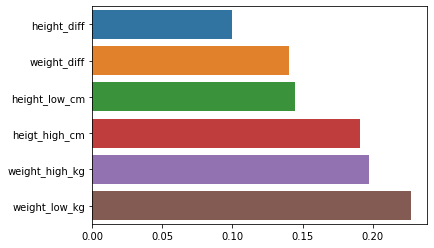

In [62]:
sns.barplot(x=feature_imp, y=feature_imp.index)

Removing the least important feature from model - height_diff

In [70]:
selected_features = ["height_low_cm","heigt_high_cm", "weight_low_kg","weight_high_kg", "weight_diff"]

In [71]:
X = dog_data_dropped[selected_features]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [73]:
dog_intelligence_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=115)

In [74]:
y_pred = dog_intelligence_model.predict(X_test)

In [75]:
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test,y_pred, average='macro') 
precision = metrics.precision_score(y_test,y_pred, average='macro', zero_division=0)

In [76]:
print("Accuracy: ", round(accuracy*100, 2), "%")
print("Recall: ", round(recall*100, 2), "%")
print("Precision: ",round(precision*100, 2), "%")

Accuracy:  56.1 %
Recall:  48.24 %
Precision:  41.27 %
